<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/shallow_vs_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#compare shallow NN with Convolution using Fashion MNIST

In [ ]:
import tensorflow as tf

In [ ]:
#load data
fashionmnist=tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels)=fashionmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#define the model(shallow)
model_shallow=tf.keras.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')])

#setup parameters -compile
model_shallow.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#training - fit
print(f'\nMODEL TRAINING :')
model_shallow.fit(training_images,training_labels,epochs=5)

#evaluate - evalutate
print(f'\nMODEL EVALUATE : ')
test_loss=model_shallow.evaluate(test_images, test_labels)


MODEL TRAINING :
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.8858 - accuracy: 0.7032
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6589 - accuracy: 0.7686
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5700 - accuracy: 0.8006
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5278 - accuracy: 0.8180
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5078 - accuracy: 0.8235

MODEL EVALUATE : 
313/313 [==============================] - 1s 3ms/step - loss: 0.5417 - accuracy: 0.8219


In [ ]:
#define the model(convolution)
model_conv=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#setup parameters - compile
model_conv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#training_fit
print(f'MODEL TRAINING : ')
model_conv.fit(training_images, training_labels, epochs=5)



MODEL TRAINING : 
Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.5947 - accuracy: 0.8209
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3532 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3095 - accuracy: 0.8850
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2816 - accuracy: 0.8955
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2575 - accuracy: 0.9028
MODEL EVALUATE :


AttributeError: ignored

In [ ]:
#evaluate
print(f'MODEL EVALUATE :')
test_loss=model_conv.evaluate(test_images, test_labels)

MODEL EVALUATE :
313/313 [==============================] - 3s 10ms/step - loss: 0.3169 - accuracy: 0.8817


In [ ]:
#visualize with convolution NN

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [ ]:
#print fahionmnist dataset's label in each index 0~100 index
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


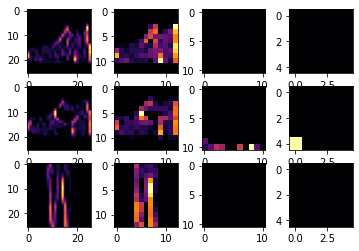

In [ ]:
#차트 만들기
f, axarr=plt.subplots(3,4)

#list
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=3
CONVOLUTION_NUMBER=1

layer_outputs=[layer.output for layer in model_conv.layers]
activation_model = tf.keras.models.Model(inputs = model_conv.input, outputs = layer_outputs)

for x in range(0,4):
  f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[0,x].grid(False)

  f2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)

  f3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)
               

In [ ]:
#CALLBACK
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=[]):
    if(logs.get('loss')<0.2):
      print("\loss is low enough stop training")
      self.model.stop_training=True

In [ ]:
callbacks=MyCallback()
model_conv.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1722 - accuracy: 0.9362


In [ ]:
model_conv.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.4159 - accuracy: 0.8900


[0.41594141721725464, 0.8899999856948853]